<a href="https://colab.research.google.com/github/j-a-r-v-i/Analyzing-the-bitcoin-trends/blob/master/NLP_build_with_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#word count
from collections import Counter

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
from google.colab import files
data_to_load = files.upload()

Saving alone (1).csv to alone (1) (4).csv
Saving fear.csv to fear (4).csv
Saving meditation.csv to meditation (4).csv
Saving panic.csv to panic (4).csv
Saving sadness.csv to sadness (4).csv
Saving suicide.xlsx to suicide (4).xlsx


In [34]:
import io
df_fear = pd.read_csv(io.BytesIO(data_to_load['fear.csv']))
df_alone = pd.read_csv(io.BytesIO(data_to_load['alone (1).csv']))
df_meditation = pd.read_csv(io.BytesIO(data_to_load['meditation.csv']))
df_panic = pd.read_csv(io.BytesIO(data_to_load['panic.csv']))
df_suicide = pd.read_excel(io.BytesIO(data_to_load['suicide.xlsx']))
df_sadness = pd.read_csv(io.BytesIO(data_to_load['sadness.csv']))

In [35]:
df_fear.head()


,User,Text,Date,Retweets,Favorites,HashTags,City
0,michaelbarata,New Blog Post: True Connection #love #connecti...,2020-07-11 16:29:35+00:00,0,0,#love #connection #fear #lawofattraction,NY
1,fvnclothing,What’s “scary” are the ppl who project their f...,2020-07-07 16:34:08+00:00,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,2020-07-07 02:34:40+00:00,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,2020-07-06 20:05:05+00:00,0,0,#bebitoblog #fear #theseuncertaintimes,NY
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,2020-06-30 12:05:40+00:00,3,2,#UnitedWeCan #citizens #communities #country #...,NY


In [36]:
df_alone.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,_TraceDollFace_,Oh a reunion heyyy #Alone,2020-07-11 19:43:21+00:00,0,0,#Alone,NY
1,_TraceDollFace_,When we get down to the winner...I'm crying by...,2020-07-11 19:34:19+00:00,0,0,#Alone,NY
2,_TraceDollFace_,So now they pulling you if you're in danger of...,2020-07-11 19:31:32+00:00,0,2,#Alone,NY
3,_TraceDollFace_,3 people left. Day 74 #Alone,2020-07-11 18:42:48+00:00,0,2,#Alone,NY
4,_TraceDollFace_,Tireder isn't a word #Alone,2020-07-11 18:40:02+00:00,0,0,#Alone,NY


In [38]:
df_fear.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,michaelbarata,New Blog Post: True Connection #love #connecti...,2020-07-11 16:29:35+00:00,0,0,#love #connection #fear #lawofattraction,NY
1,fvnclothing,What’s “scary” are the ppl who project their f...,2020-07-07 16:34:08+00:00,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,2020-07-07 02:34:40+00:00,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,2020-07-06 20:05:05+00:00,0,0,#bebitoblog #fear #theseuncertaintimes,NY
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,2020-06-30 12:05:40+00:00,3,2,#UnitedWeCan #citizens #communities #country #...,NY


In [39]:
df_panic.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,Moosekj25,"Hey, so if Maxwell meets a premature end here ...",2020-07-10 13:34:46+00:00,0,0,#DeepStateCabal #PANIC,NY
1,fishonkikki,I hear ya. #badbussiness #gamestopfails @games...,2020-06-04 22:10:45+00:00,0,0,#badbussiness #gamestopfails #panic #preorders...,NY
2,Nikosak,#Police Sirens in the background. People hunke...,2020-06-02 03:25:18+00:00,0,1,#Police #panic #fear #pandemic #looters #Riote...,NY
3,Nikosak,NYC preparing for #Curfew. First time since #1...,2020-06-02 02:49:15+00:00,0,1,#Curfew #PANIC #Cuomo #BlackLivesMatter #Black...,NY
4,LaPerraShow,ARE YOU SERIOUS @realDonaldTrump?Is this the #...,2020-05-19 04:00:52+00:00,1,0,#best #FakeNews #TrumpAdministration #America ...,NY


In [40]:
df_suicide.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,2020-07-10 17:56:18+00:00,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY
1,BelvyBenjamin,#ghislainemaxwell #epsteindidntkillhimself #je...,2020-07-08 21:26:43+00:00,0,0,#ghislainemaxwell #epsteindidntkillhimself #je...,NY
2,BelvyBenjamin,#ghislainemaxwell #footage #epsteined #epstein...,2020-07-06 15:12:57+00:00,0,0,#ghislainemaxwell #footage #epsteined #epstein...,NY
3,BelvyBenjamin,#ghislainemaxwell #hillaryclinton #epsteined #...,2020-07-04 14:04:37+00:00,0,0,#ghislainemaxwell #hillaryclinton #epsteined #...,NY
4,BelvyBenjamin,#ghislainemaxwell #epsteined #epsteindidntkill...,2020-07-02 21:10:16+00:00,0,0,#ghislainemaxwell #epsteined #epsteindidntkill...,NY


In [41]:
df_sadness.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,sackec,Couldn’t be more accurate! The MLS will now ha...,2020-07-01 12:42:16+00:00,0,0,#getoutofnyasfastasyoucan #sadness,NY
1,JohnnyQ2497,Disney and Pixar’s Inside Out was released in ...,2020-06-20 00:00:13+00:00,3,6,#InsideOut #Pixar #Joy #Sadness #Anger #Disgus...,NY
2,PrairiesDawn,Each of my tears have a name in it. #sadness,2020-06-14 15:56:39+00:00,0,1,#sadness,NY
3,leroe24fotos,Posted withregram • hurtingsouls This gave me ...,2020-06-03 21:18:24+00:00,0,0,#blacklivesmatter #blacklivesmatter #justicefo...,NY
4,coachantonionyc,My #amore CRISTI LUCAS LEONARDO #wearamask Cro...,2020-05-25 16:13:54+00:00,0,0,#amore #wearamask #queensborobridge #sundayfun...,NY


In [42]:
print(df_fear.shape)
print(df_alone.shape)
print(df_sadness.shape)
print(df_suicide.shape)
print(df_panic.shape)
print(df_meditation.shape)

(630, 7)
(304, 7)
(113, 7)
(520, 7)
(219, 7)
(3051, 7)


In [43]:
df= pd.concat([df_fear, df_alone,df_sadness,df_suicide,df_panic,df_meditation])

df['date'] = pd.to_datetime(df['Date']).dt.date
df['time'] = pd.to_datetime(df['Date']).dt.time




In [44]:
df=df.drop(["Date"],axis=1)

In [45]:
# drop duplicate rows
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['Text'],inplace =True)

In [46]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40


In [47]:
print('shape:', df.shape)
print('number of tweets:', df['Text'].nunique())
print('number of users:', df['User'].nunique())

print("range:", df['date'].min(),",", df['date'].max())
print("dates:",df['date'].nunique())

shape: (3181, 8)
number of tweets: 3181
number of users: 1618
range: 2019-10-05 , 2020-07-11
dates: 281


In [48]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
HashTags,2,0.1


In [49]:
# plot number of tweets everyday
fig = plt.figure(figsize = (500,100))
chart = sns.countplot(df['date'], order = sorted(df['date'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per day')

Text(0.5, 1.0, 'Number of Tweets per day')

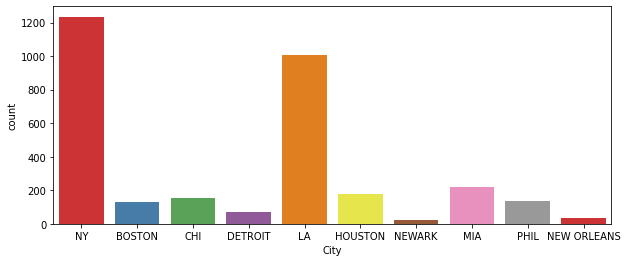

In [50]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df["City"],palette='Set1',ax=ax)


Text(0.5, 1.0, 'Number of Tweets in Different Cities Groups across Dates')

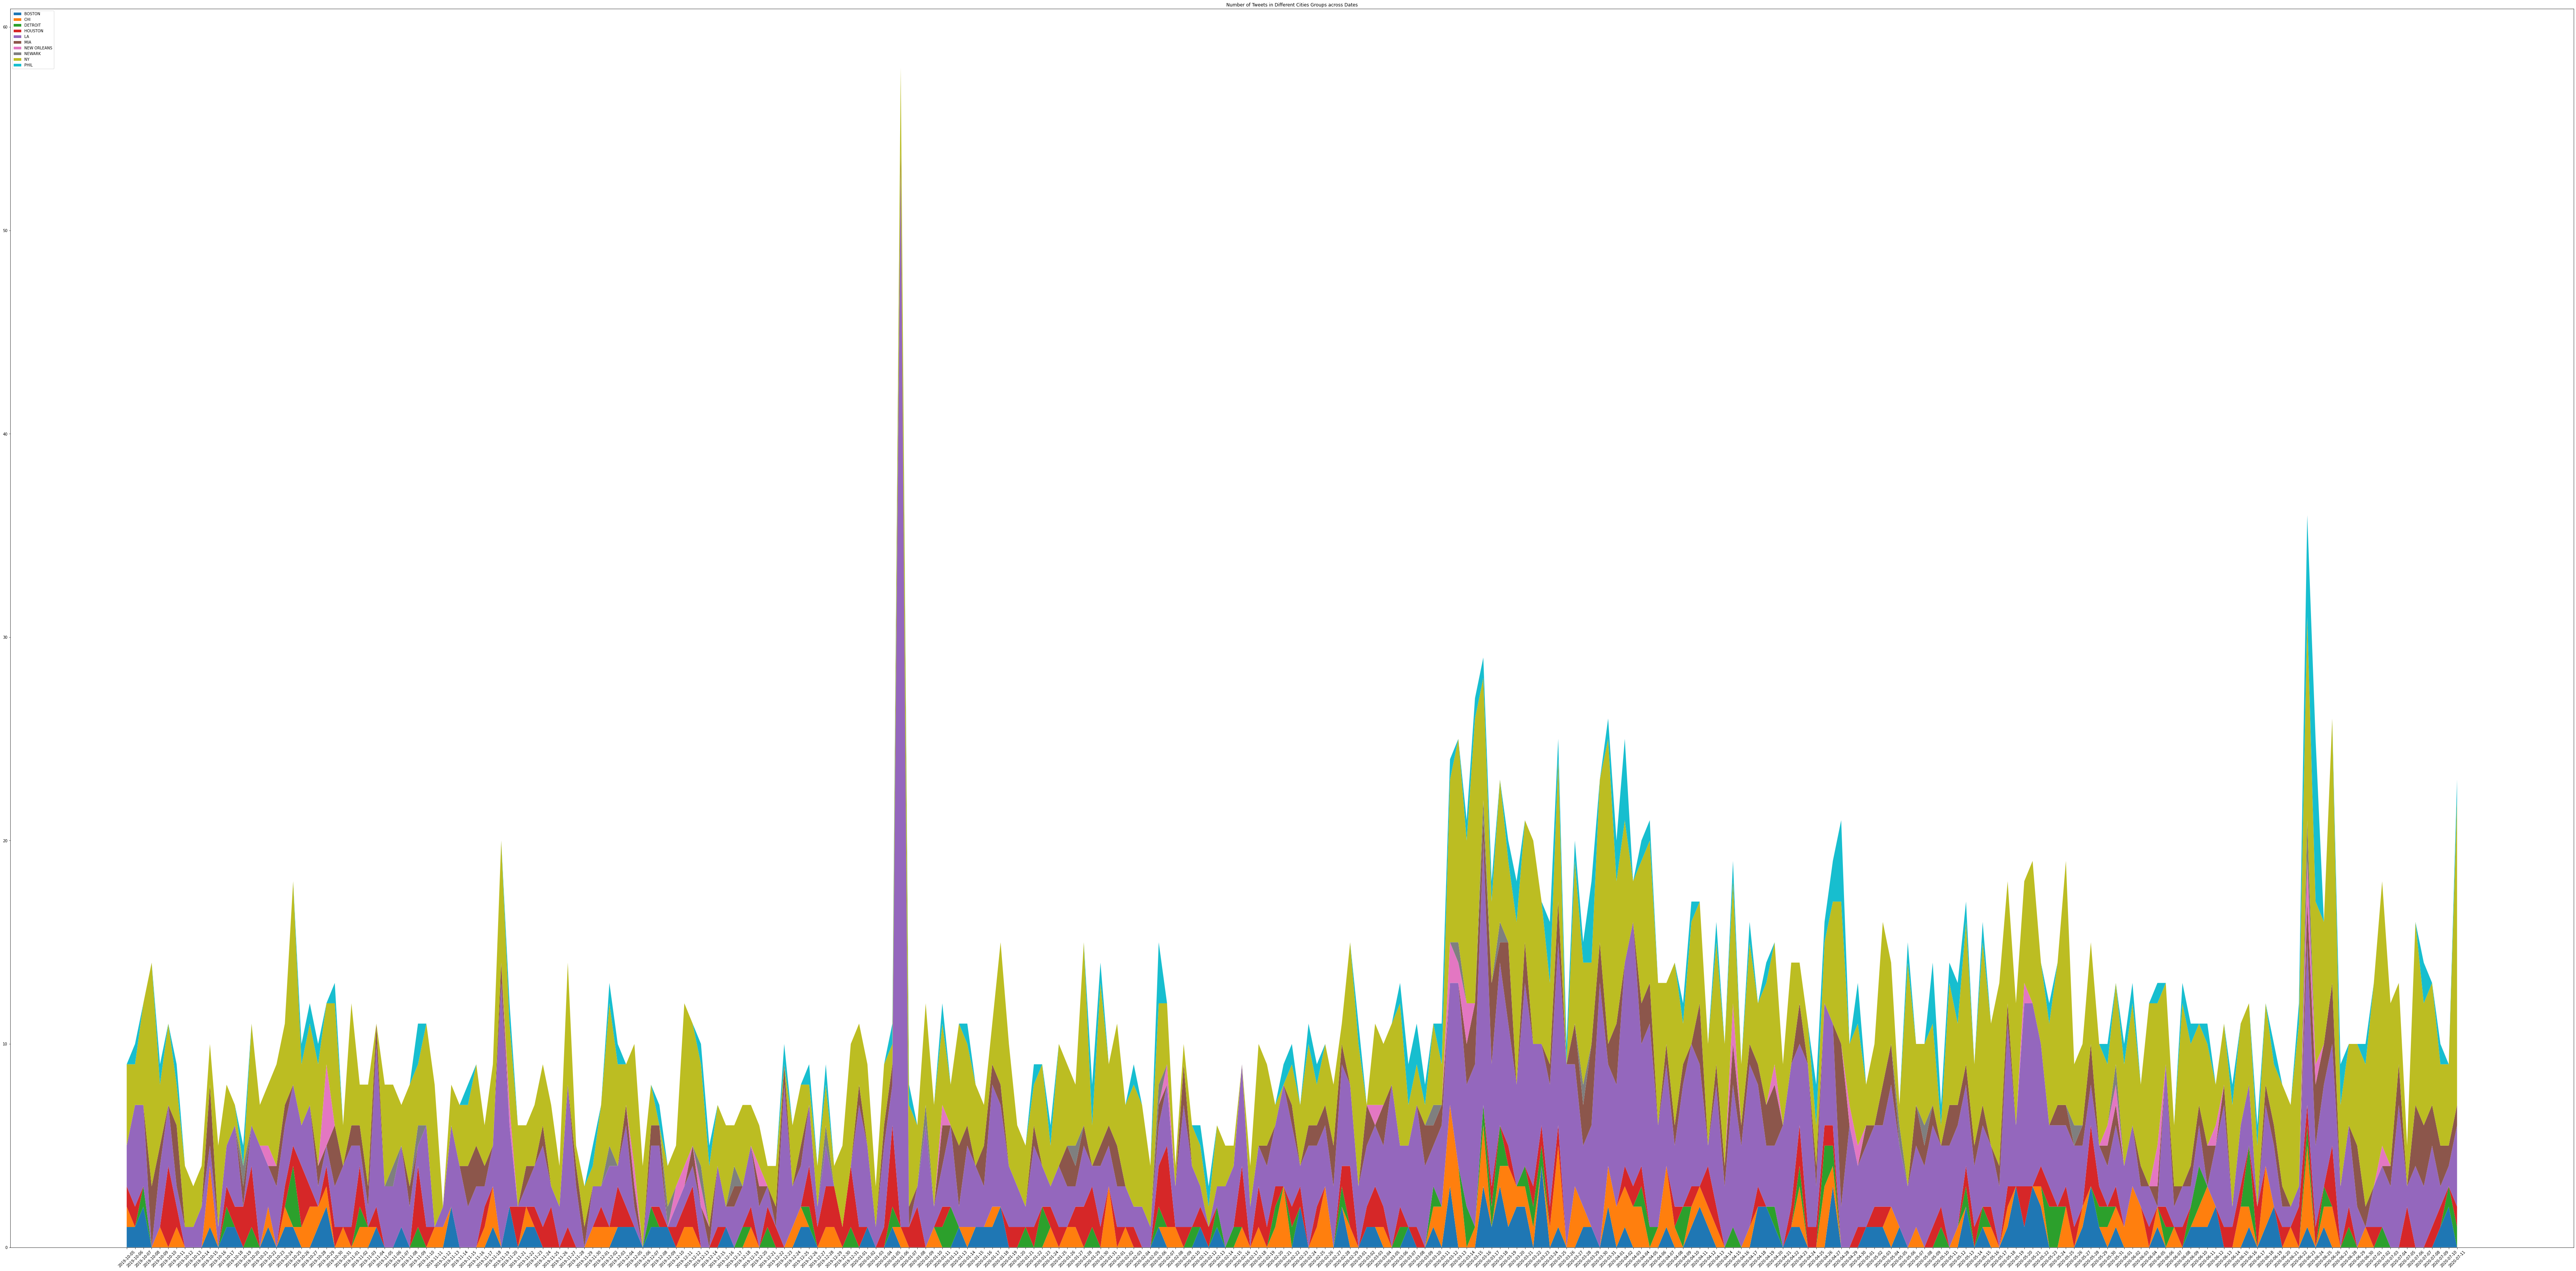

In [51]:
# plot number of tweets everyday in each city 
pivot = pd.pivot_table(df, index=['City'],
                         columns=['date'],
                         values=['Text'], 
                         aggfunc = lambda x: len(x), 
                         fill_value=0)

fig= plt.figure(figsize = (121,60))
plt.stackplot(sorted(df['date'].unique()), pivot.values, labels = pivot.index)
ax = plt.gca()
ax.set_xticks(sorted(df['date'].unique()))
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.title('Number of Tweets in Different Cities Groups across Dates')

In [52]:
# extract data that doesn't contain NAs only
df = df[df['HashTags'].notna()]

# TEXT PREPROCESSING

In [53]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

# remove urls from text
def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

# remove @accounts (@[A-Za-z0–9]+)|, emojis，#hashtags, com frin text
def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

In [54]:
# apply all the preprocess functions
df['text_nlp'] = preprocess(df.Text)
df['text_nlp'] = df['text_nlp'].apply(remove_urls)
df['text_nlp'] = df['text_nlp'].apply(removes)

In [55]:
# text before preprocessing
df.Text[5]

5    62 feels good. #reginaedelmanphoto #yoga #hand...
5    Damn they told Dave he gotta go home. He had f...
5    Crossing the #queensborobridge #sundayfunday w...
5    Hope I don’t end up “#missing” or on a tree ha...
5    What a couple of drama #queens only you leftis...
5    Believe what your heart tells you, not what ot...
Name: Text, dtype: object

In [56]:
# text after preprocessing
df.text_nlp[5]

5    62 feels good.                  @New York, New...
5    Damn they told Dave he gotta go home. He had f...
5    Crossing the   w the  after    3 hr  so much  ...
5    Hope I don’t end up “” or on a tree hanging by...
5    What a couple of drama  only you leftists sens...
5    Believe what your heart tells you, not what ot...
Name: text_nlp, dtype: object

In [57]:
# Get the lenghth of text and word count
df['text_len'] = df.text_nlp.astype(str).apply(len)
df['word_count'] = df.text_nlp.apply(lambda x: len(str(x).split()))

In [58]:
# Handling Abbreviation
def decontracted(phrase):
    phrase = re.sub(r"that\'s", "that is", phrase)   
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# decontracte words
df.text_nlp = df.text_nlp.apply(lambda x: decontracted(x).lower())

In [59]:
# remove stop words
stop_words = stopwords.words('english')
not_stopwords = {}
common_words =['com','twitter','please',
               'the','would','could','can','may','must', 
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.text_nlp = df.text_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [60]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.text_nlp = df.text_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.text_nlp = df.text_nlp.apply(lambda x: rm_space.sub(' ', x))

In [61]:
df.text_nlp[5]

5                      62 feels good new york new york
5             damn told dave gotta go home food eating
5    crossing w 3 hr much much time bridge without ...
5             hope don t end tree hanging posted this 
5    couple drama leftists sensed panic one else di...
5             believe heart tells you others tell you 
Name: text_nlp, dtype: object

# **Sentiment Analysis**

In [62]:
# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.0, 1000.0)

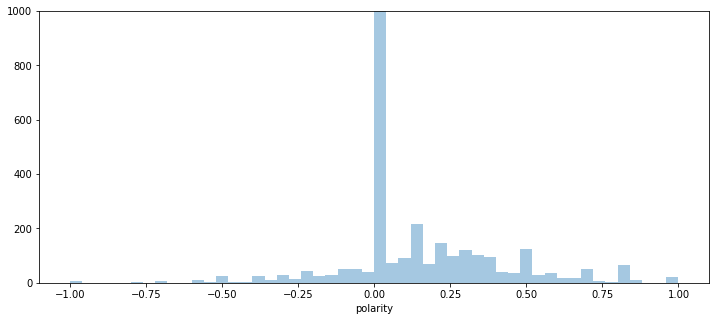

In [63]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df['polarity'],kde = False)
plt.ylim(0, 1000)

In [65]:
df[df['polarity']<-0.8]['Text']

19      There are 269,000 tons of plastic float in the...
115     Being alone isn’t the worst case scenario but ...
111     @LoriGrande3 #sadness that the world's biggest...
117     #Suicide is a devastating reality among health...
23      Make it so I don’t have to go to work, but the...
1108    U Ever Notice #DonaldTrump Would Rather Point ...
Name: Text, dtype: object

In [66]:
# Sentiment 
df.groupby('sentiment').Text.count()

sentiment
negative     373
neutral     1298
positive    1508
Name: Text, dtype: int64

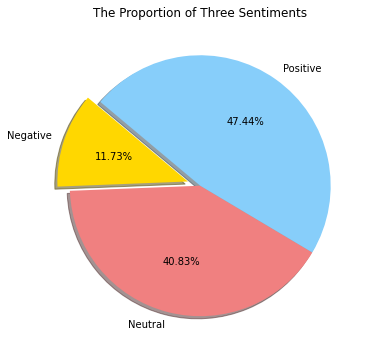

In [67]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

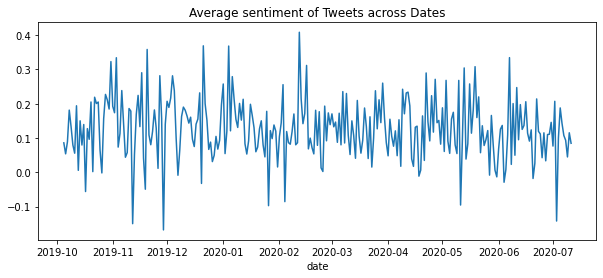

In [68]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['polarity'].plot(kind = 'line')
plt.title('Average sentiment of Tweets across Dates')

# Word Clouds

In [69]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['text_nlp']))): 
    for word in df['text_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|██████████| 3179/3179 [00:00<00:00, 46444.62it/s]


In [70]:
from PIL import Image
import requests
from io import BytesIO



In [72]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()
response = requests.get("https://img.etimg.com/thumb/msid-67684689,width-650,imgsize-70881,,resizemode-4,quality-100/twittersized.jpg")
mask = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
response=requests.get("https://www.kindpng.com/picc/b/29/296969.png")
color = np.array(Image.open(BytesIO(response.content)).convert("RGB"))

def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
#color=np.apply_along_axis(func, 2, color)

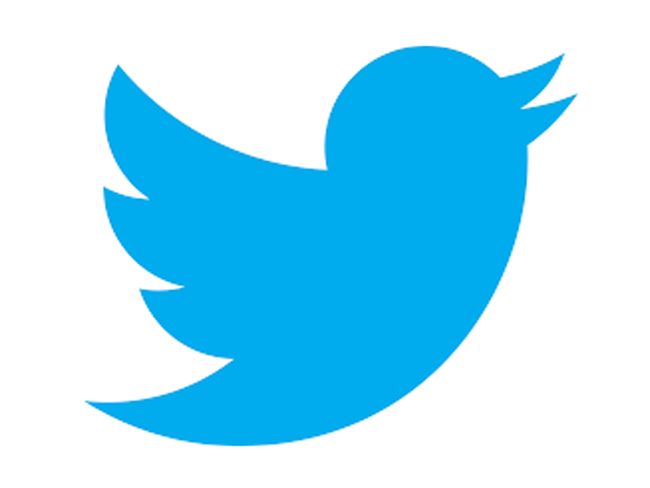

In [73]:
Image.fromarray(mask,"RGB")

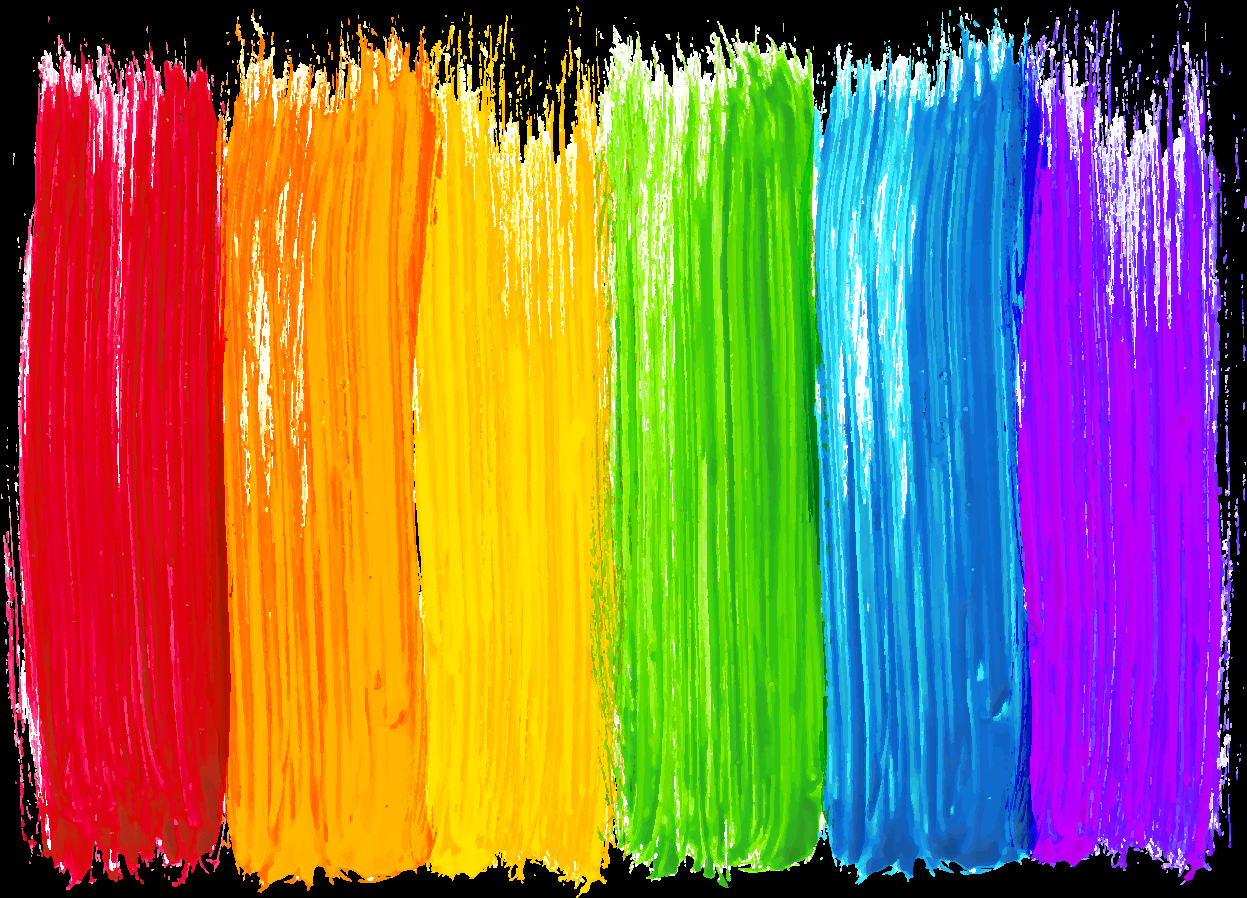

In [74]:
Image.fromarray(color,"RGB")

In [75]:
add_stopwords = ['day','like','go','one','today','let','get',
 '2', '1','3','4','5','take','make','think','want','way',
'see','still', 'via', 'now','much', 'even','watch','क',
 'all','really','thing', 'every','around','here','made',
 'also','part','total', 'things',  'little','getting',
 'last','essential','long', 'another', 'look', 'next','there',
 'people','time','new','thank','need','good','going','know',
 'week','everyone','live','love','right','home','us','stay','re',
'help', 'work', 'quarantine', 'life', 'keep', 'york', "york'", 'don']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])

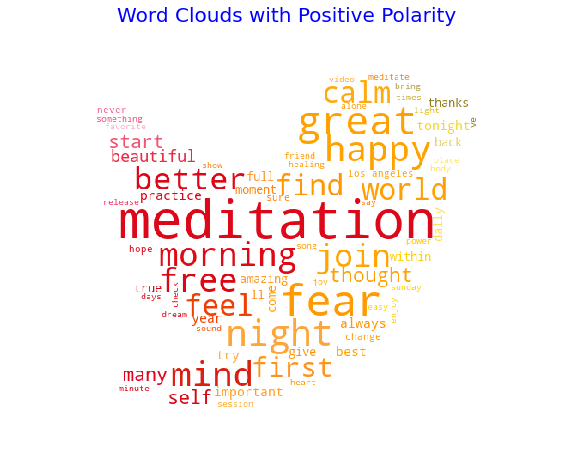

In [76]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'positive'])))
    # declare our figure  
image_colors = ImageColorGenerator(color)
plt.figure(figsize=(10,9))
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#0000FF')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [77]:
wordcloud.to_file('positive.png')

In [78]:


response=requests.get("https://data.whicdn.com/images/6083782/original.jpg")
red = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
red=np.apply_along_axis(func, 2, red)

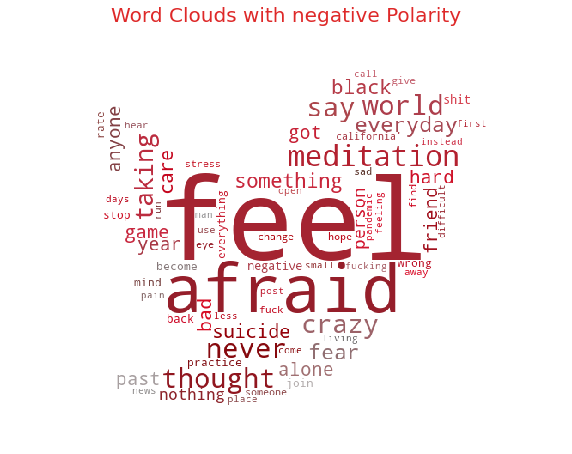

In [79]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white', stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'negative'])))
    # declare our figure  
image_colors = ImageColorGenerator(red)
plt.figure(figsize=(10,9))
plt.title("Word Clouds with negative Polarity", fontsize=20,color='#DE2929')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [80]:
wordcloud.to_file('negative.png')

# **Topic Modeing**
## preprocessing for Topic Modeling¶

In [81]:
!pip install pyLDAvis

In [82]:
!pip install gensim --upgrade

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [22]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [23]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2020-07-25 17:48:08--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  11.8MB/s    in 1.3s    

2020-07-25 17:48:10 (11.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [83]:
import zipfile
from google.colab import files

uploaded = files.upload()

Saving alone (1).csv to alone (1) (5).csv
Saving fear.csv to fear (5).csv
Saving mallet-2.0.8.zip to mallet-2.0.8 (2).zip
Saving meditation.csv to meditation (5).csv
Saving panic.csv to panic (5).csv
Saving sadness.csv to sadness (5).csv
Saving suicide.xlsx to suicide (5).xlsx


In [84]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,text_nlp,text_len,word_count,polarity,sentiment
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,new blog post true connection,34,5,0.243182,positive
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,what s scary ppl project fears onto others don...,149,26,-0.550000,negative
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,jɇɽɽɏ quiet mind able hear intuition fear run ...,118,21,0.193182,positive
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,thoughts fear,28,4,0.000000,neutral
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,every it s it s it s it s go mindful one anoth...,147,33,0.000000,neutral


In [87]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [85]:
 #Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [86]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['text_nlp']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('english')
# 'home', 'stay','new','york', 'time',
newStopWords =  ['s','t',  'm', 're','don','ve','2', '3', '1', 
                 'it', 'i', 'us', 'get', 'you', 'let', 'going', 'know', 
                'make', 'take', 'still','got', 'can', 'this', 'all', 'me','go',
                'even', 'here', 'well', 'much', 'many', 'way', 'want', 'every', 'little']
stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [88]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [89]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Finding the optimal number of topics using LdaMallet model

In [91]:
start=24
limit=32
step=2
random = 155

In [92]:
# Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=random)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
# compute coherence values for each model
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

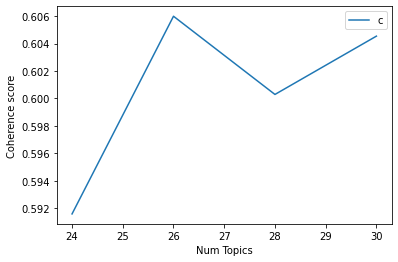

In [94]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [97]:
# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 24  has Coherence Value of 0.5916
Num Topics = 26  has Coherence Value of 0.606
Num Topics = 28  has Coherence Value of 0.6003
Num Topics = 30  has Coherence Value of 0.6045


## Finding Key Words for each topic using optimal LdaMallet model

In [98]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=30, 
                                             id2word=id2word,
                                             random_seed = 155)

In [119]:
# Show Topics
model_topics = ldamallet.show_topics(formatted=False)
pprint(sorted(ldamallet.print_topics(num_words=8)))


[(0,
  '0.065*"minute" + 0.042*"lead" + 0.036*"hour" + 0.033*"include" + '
  '0.029*"pain" + 0.025*"set" + 0.025*"stream" + 0.021*"wisdom"'),
 (1,
  '0.119*"find" + 0.073*"bring" + 0.068*"energy" + 0.057*"peace" + '
  '0.057*"hope" + 0.039*"light" + 0.036*"positive" + 0.025*"message"'),
 (3,
  '0.117*"give" + 0.058*"back" + 0.035*"understand" + 0.035*"panic" + '
  '0.033*"grateful" + 0.030*"watch" + 0.030*"level" + 0.028*"nice"'),
 (5,
  '0.138*"listen" + 0.134*"friend" + 0.118*"copy" + 0.113*"awareness" + '
  '0.072*"repost" + 0.070*"demonstrate" + 0.045*"retweet" + 0.013*"big"'),
 (6,
  '0.261*"love" + 0.090*"happy" + 0.060*"share" + 0.053*"die" + 0.042*"eat" + '
  '0.028*"high" + 0.023*"train" + 0.018*"song"'),
 (7,
  '0.178*"feel" + 0.053*"week" + 0.053*"yoga" + 0.051*"talk" + 0.033*"amazing" '
  '+ 0.026*"spend" + 0.024*"evening" + 0.018*"music"'),
 (8,
  '0.076*"free" + 0.048*"bad" + 0.040*"water" + 0.036*"make" + 0.032*"idea" + '
  '0.026*"faith" + 0.022*"plan" + 0.022*"headspac

In [100]:
topics = pd.DataFrame(sorted(ldamallet.print_topics(num_words=10)))
topics.columns = ['Topic_num','Key_words']
topics.to_csv('30_topics_2.csv',index = False)

In [111]:
topics.head()

,Topic_num,Key_words
0,0,"0.065*""minute"" + 0.042*""lead"" + 0.036*""hour"" +..."
1,1,"0.119*""find"" + 0.073*""bring"" + 0.068*""energy"" ..."
2,2,"0.065*""life"" + 0.061*""power"" + 0.042*""enjoy"" +..."
3,3,"0.117*""give"" + 0.058*""back"" + 0.035*""understan..."
4,4,"0.077*""stop"" + 0.059*""open"" + 0.045*""eye"" + 0...."


In [118]:
topics.shape

(20, 2)

In [101]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.6045365658048881


In [125]:
topic_names = ['find/bring/energy/peace',
  'hope/light/positive/message']
 
 

In [126]:
len(topic_names)

2

# Topic vector

In [127]:
topics_docs = []
for m in ldamallet[corpus]:
    topics_docs.append(m)

train_vecs = []
for i in topics_docs:
    topic_vec = [j[1] for j in i]
    train_vecs.append(topic_vec) 

topic_dis = pd.DataFrame(train_vecs,columns=topic_names)
print(topic_dis.head())
print(topic_dis.shape)
print(df.shape)

df= pd.concat([df,topic_dis],axis = 1)
df.head(2)

ValueError: ignored

# Word vector

In [103]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,text_nlp,text_len,word_count,polarity,sentiment
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,new blog post true connection,34,5,0.243182,positive
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,what s scary ppl project fears onto others don...,149,26,-0.550000,negative
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,jɇɽɽɏ quiet mind able hear intuition fear run ...,118,21,0.193182,positive
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,thoughts fear,28,4,0.000000,neutral
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,every it s it s it s it s go mindful one anoth...,147,33,0.000000,neutral


In [108]:
df['text_nlp'][df['sentiment'] == 'positive'][:3000]

0                           new blog post true connection
2       jɇɽɽɏ quiet mind able hear intuition fear run ...
5                         62 feels good new york new york
7       worries doubts build character needed best sel...
8       want live want neighbor want able drive walk w...
                              ...                        
3041     new video alert zootedzoo dropping tomorrow 12pm
3042    join us 10 minutes facebook live myhearthands ...
3043    join us morning meditation heart stephozzy3000...
3044    save date mindful mediation heart hosted myhea...
3047               enjoy happy 4 20 new orleans louisiana
Name: text_nlp, Length: 1508, dtype: object

In [109]:
# Creat all the interested word for analysis
Interesting_words = ['tv','reading','video','game','drinking','puzzle','beach','eating','walking',
                 'tiktok','music','spotify','talk','gym','exercise','phone','zoom',
                'talk','eat','youtube','netflix','watch','episode','workout','challenge',
                 'listen','song','park','beach','reading',
                 'puzzle','sleeping','sleep','instagram','ins','virtual',
                 'lunch','breakfast','dinner','cooking','working',
                 'social','friends','friend','family','kids','delivery','wine']

In [110]:
for col in Interesting_words:
    StayHome[col]=StayHome.text_nlp.apply(lambda x: int(col in str(x)))

NameError: ignored